In [54]:
import statsmodels.api

In [69]:
import pathlib
import json
import geojson
import datashader
import pandas
import toolz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f = pathlib.Path('/Users/baart_f/data/BOX061_transects_rates.json')

In [16]:
data = geojson.load(f.open())

In [ ]:
feature = data['features'][0]
records = []
for feature in data['features']:
    # fold
    record = toolz.merge(*toolz.get(['properties', 'geometry'], feature))
    records.append(record)
df = pandas.DataFrame(records)

RMSE                                                                     17.453
b_unc                                                                       7.6
change_rate                                                                -0.4
change_rate_unc                                                             0.4
coordinates                   [[115.67817480305608, -34.47973884802565], [11...
country_id                                                                  AUS
country_name                                                          Australia
distances                     [869.3256292927762, 865.4742744561033, 880.876...
dt                            [29.002648925, 4.00008213721, 17.0024025134, 2...
flag_ok                                                                    True
flag_sandy                                                                False
intercept                                                                 878.5
intersection_10.0015742965          [[11

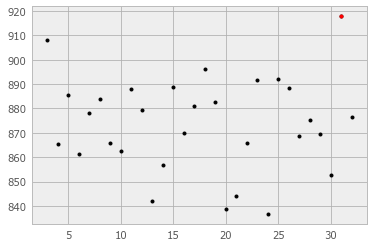

In [71]:
record = df.iloc[1]
_ = plt.plot(record['dt'], record['distances'], 'k.')
_ = plt.plot(np.array(record['dt'])[record['outliers']], np.array(record['distances'])[record['outliers']], 'r.')
record

In [73]:
y = np.array(record['distances'])
y[record['outliers']] = None
model = statsmodels.api.OLS(y, statsmodels.api.add_constant(record['dt']), missing='drop')
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8434
Date:                Thu, 20 Apr 2017   Prob (F-statistic):              0.367
Time:                        09:55:10   Log-Likelihood:                -124.08
No. Observations:                  29   AIC:                             252.2
Df Residuals:                      27   BIC:                             254.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        878.4805      7.576    115.956      0.000       862.936   894.025
x1            -0.3661      0.399     -0.918      0.367        -1.184     0.452
==============================================================================
Omnibus:                        1.455   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.247
Skew:                          -0.340   Prob(JB):                        0.536
Kurtosis:                       2.245   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""